In [1]:
from susy_qm import create_vqd_plots
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [9]:
folder_path = r"C:\Users\johnkerf\Desktop\Quantum-Computing\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQD\Destructive SWAP\Files"
potentials = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
cutoffs = [2,4,8,16,32]

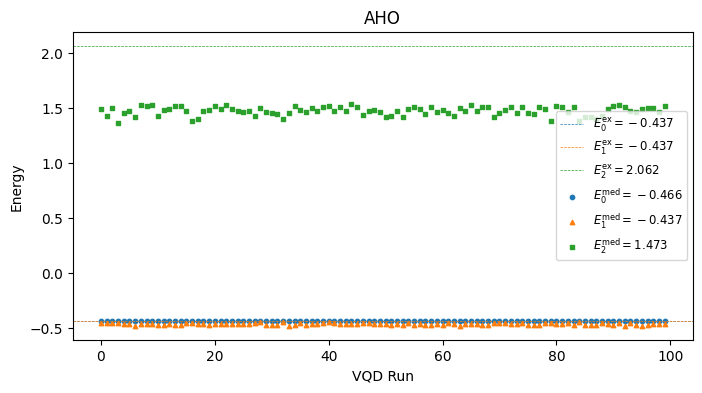

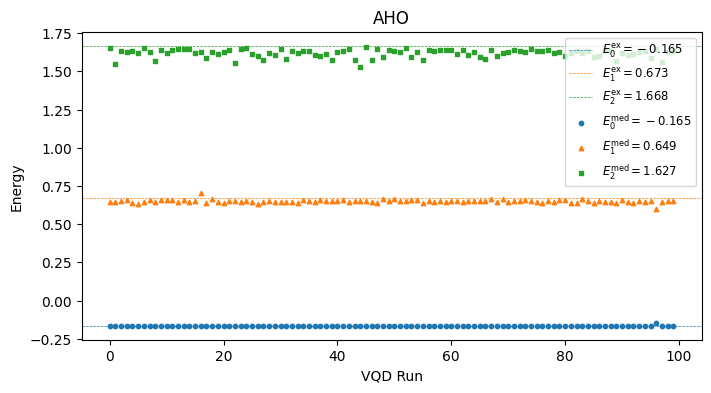

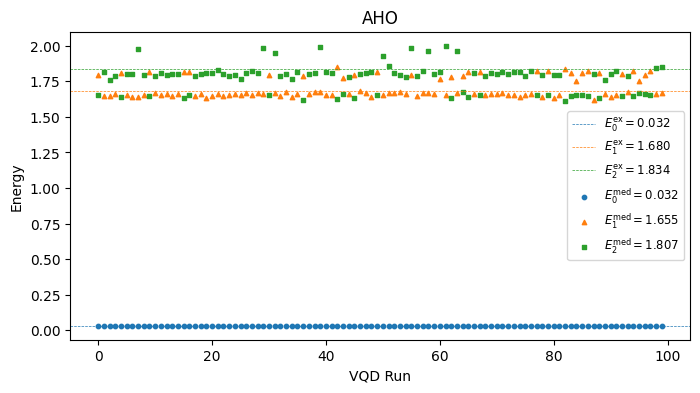

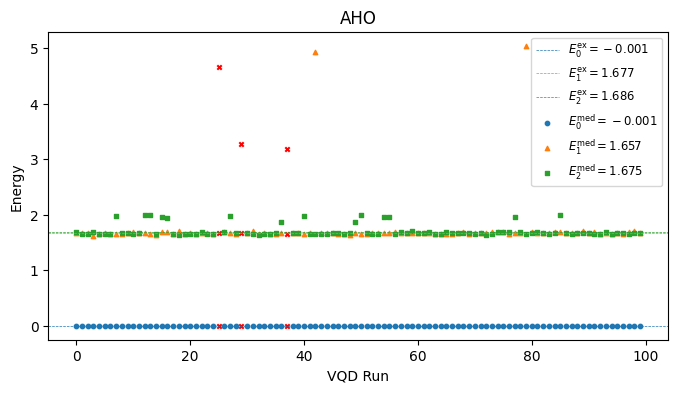

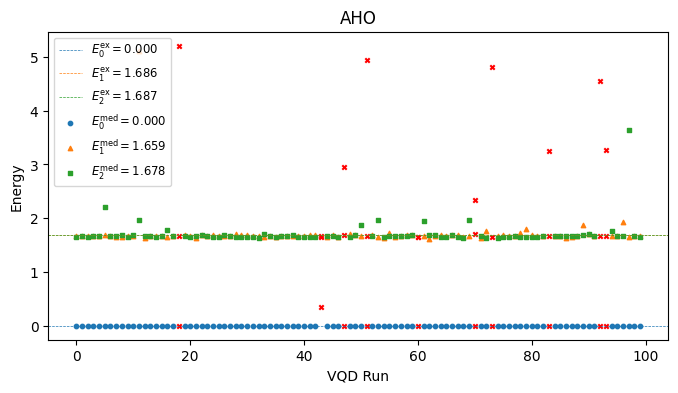

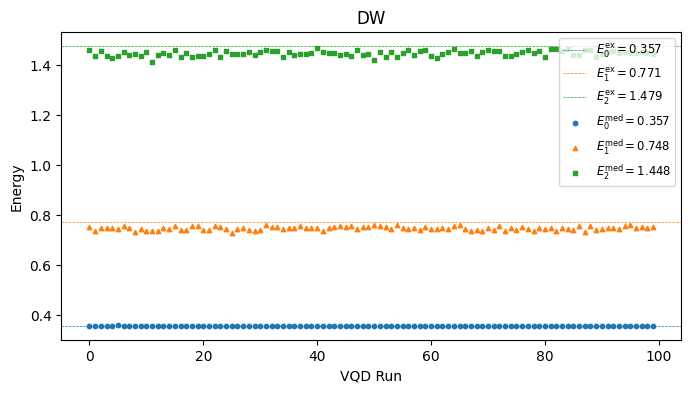

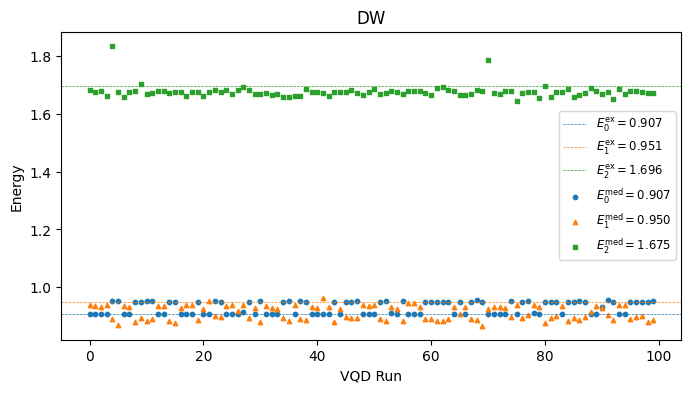

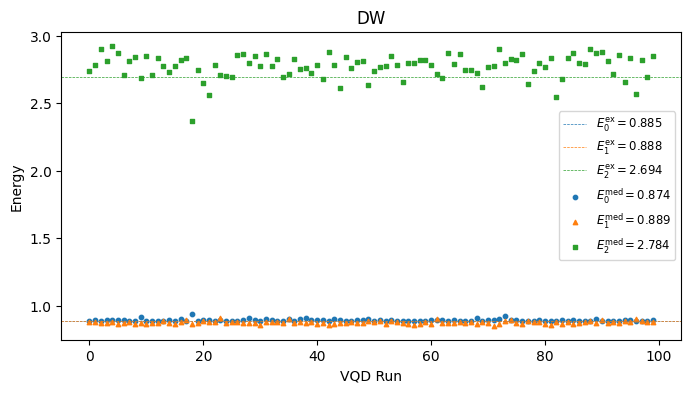

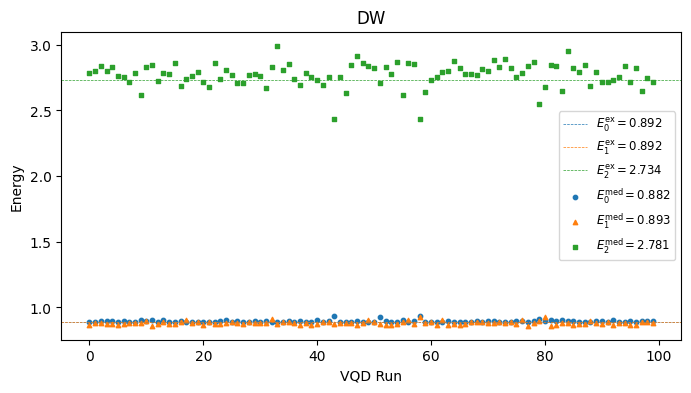

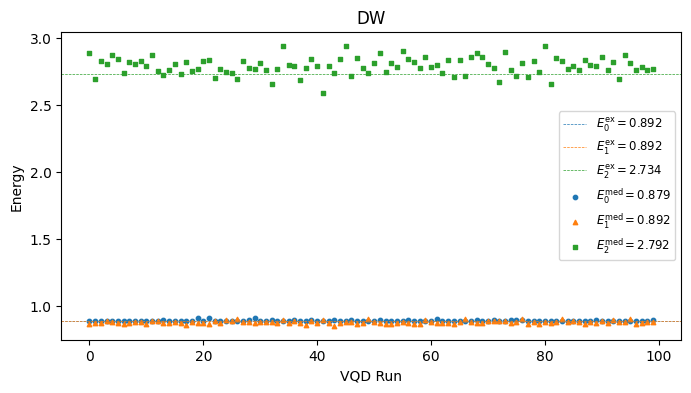

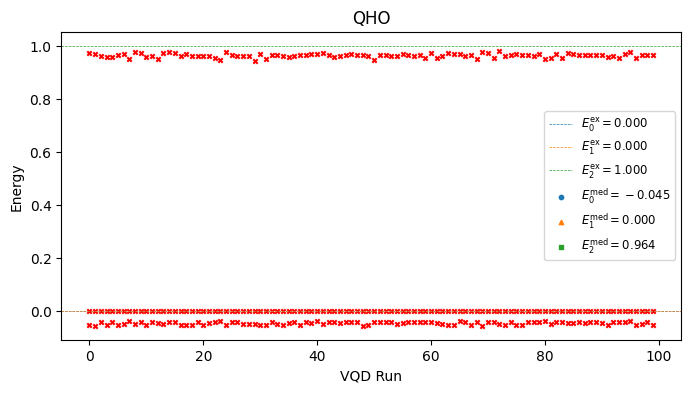

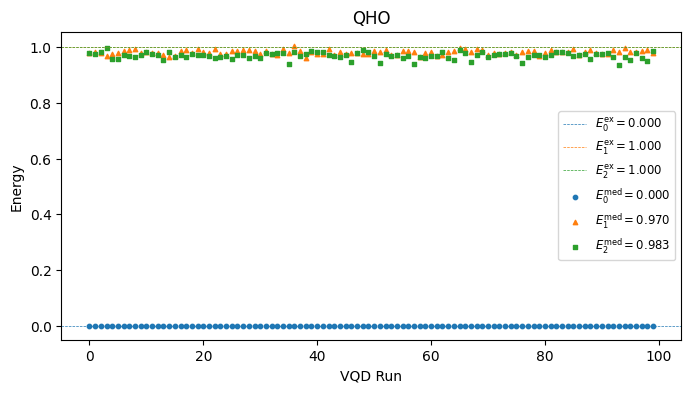

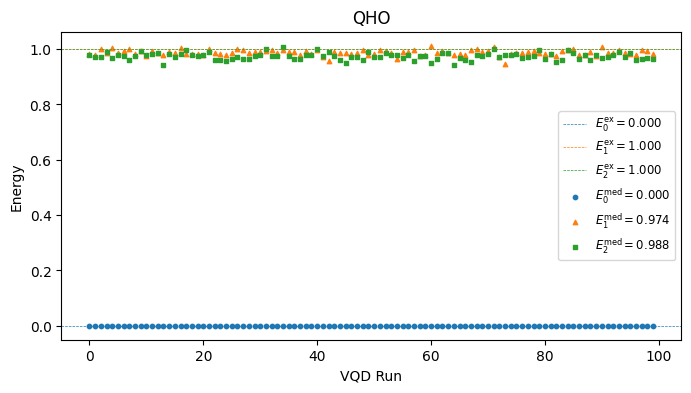

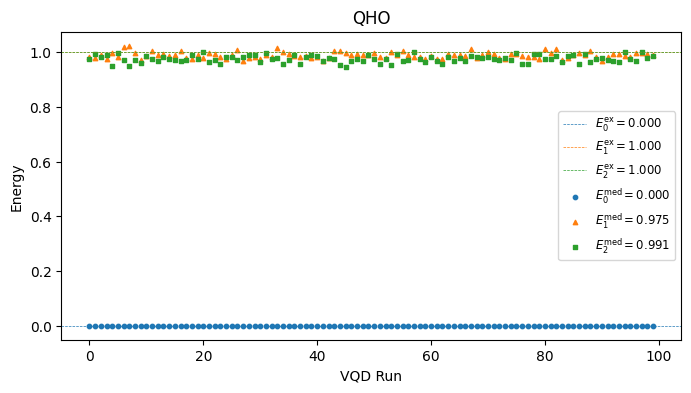

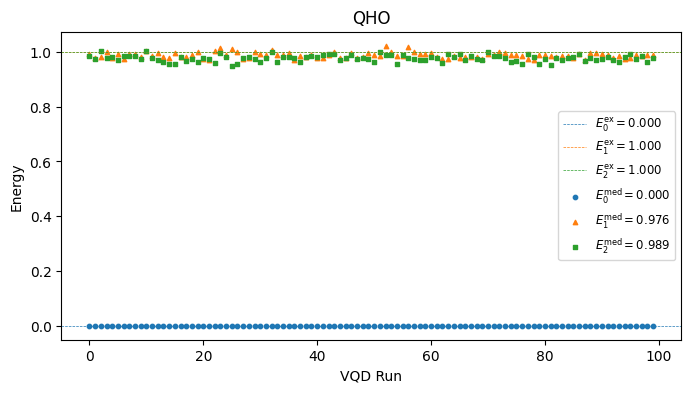

In [10]:
all_data = []
converged_only = False

for potential in potentials:
    for cutoff in cutoffs:

        data_path = folder_path + "\\{}\\{}_{}.json".format(potential,potential, cutoff)
                
        with open(data_path, 'r') as file:
            d = json.load(file)

        all_data.append(d)


        data = d
        num_VQD = data['num_VQD']
        potential = data['potential']

        converged = [all(x) for x in data['success']]
        converged_indices = [i for i, success in enumerate(converged) if success]

        if converged_only:
            results = [data['results'][i] for i in converged_indices]
        else:
            results = data['results']

        results = np.sort(results)
        transposed_energies = list(zip(*results))
        medians = [np.median(energies) for energies in transposed_energies]

        plt.figure(figsize=(8,4))
        marker_styles = ['o', '^', 's']
        color_map = ['tab:blue', 'tab:orange', 'tab:green']

        for i in range(3):
            for run_idx, energies in enumerate(data['results']):
                energy = energies[i]
                if converged[run_idx]:
                    plt.scatter(run_idx, energy, s=10, marker=marker_styles[i],
                            color=color_map[i])
                elif not converged_only:
                    plt.scatter(run_idx, energy, s=10, marker='x', color='red')

            plt.axhline(data['exact_eigenvalues'][i], color=color_map[i], linestyle='--', linewidth=0.5,
                    label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

        for i in range(3):
            plt.scatter([], [], s=20, marker=marker_styles[i], color=color_map[i],
                    label=f"$E_{{{i}}}^{{\\text{{med}}}} = {medians[i]:.3f}$")

        plt.title(f"{potential}")#: $\Lambda$ = {data['cutoff']}
        plt.xlabel("VQD Run")
        plt.ylabel("Energy")
        plt.legend(fontsize='small', markerscale=0.7)

        #plt.show()
        save_path = os.path.join(folder_path, potential, f"{potential}{cutoff}.png")
        plt.savefig(save_path)


In [ ]:
converged_only = True
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)

marker_styles = ['o', '^', 's']
color_map = ['tab:blue', 'tab:orange', 'tab:green']

for plot_idx in range(3):
    data = all_data[plot_idx]
    num_VQD = data['num_VQD']
    potential = data['potential']

    converged = [all(x) for x in data['success']]
    converged_indices = [i for i, success in enumerate(converged) if success]

    if converged_only:
        results = [data['results'][i] for i in converged_indices]
    else:
        results = data['results']

    results = np.sort(results)
    transposed_energies = list(zip(*results))
    medians = [np.median(energies) for energies in transposed_energies]

    ax = axes[plot_idx]

    for i in range(3):
        for run_idx, energies in enumerate(data['results']):
            energy = energies[i]
            if converged[run_idx]:
                ax.scatter(run_idx, energy, s=10, marker=marker_styles[i],
                           color=color_map[i])
            elif not converged_only:
                ax.scatter(run_idx, energy, s=10, marker='x', color='red')

        ax.axhline(data['exact_eigenvalues'][i], color=color_map[i], linestyle='--', linewidth=0.5,
                   label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

    for i in range(3):
        ax.scatter([], [], s=20, marker=marker_styles[i], color=color_map[i],
                   label=f"$E_{{{i}}}^{{\\text{{med}}}} = {medians[i]:.3f}$")

    ax.set_title(f"{potential}")#: $\Lambda$ = {data['cutoff']}
    if plot_idx == 2:
        ax.set_xlabel("VQD Run")
    ax.set_ylabel("Energy")
    ax.legend(fontsize='small', markerscale=0.7)

plt.tight_layout()
#plt.show()

# Save the full figure with all 3 plots layered
save_path = os.path.join(folder_path, "VQD-combined.png")
plt.savefig(save_path)
